In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Loucks (2018) Ti in zircon equation
def T_calc(Ti_zrc, P, aTiO2, aSiO2):
    T_K = (-4800+(0.4748*(P-1000)))/(np.log10(Ti_zrc)-5.5711-np.log10(aTiO2)+np.log10(aSiO2))
    T_C = T_K - 273.15
    return(T_C)

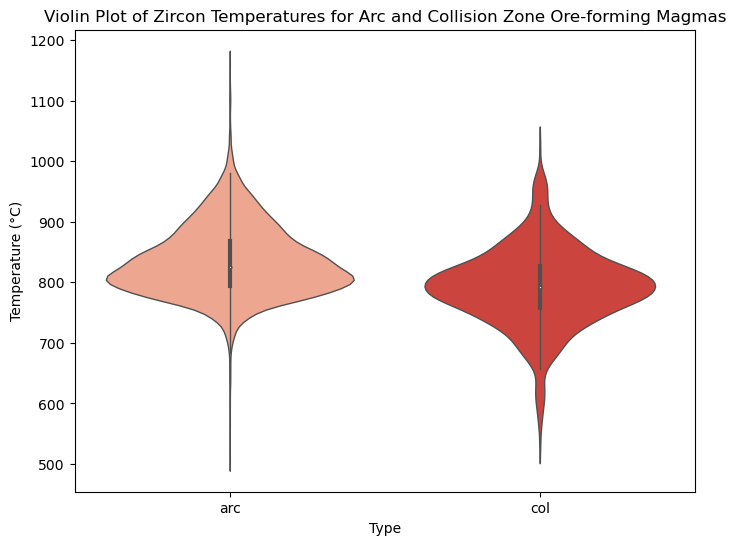

In [3]:
qvc_zircon = pd.read_csv('Zircon.csv')
aTiO2 = 0.7
qvc_zircon['Temperature'] = qvc_zircon.apply(lambda row: T_calc(row['Ti49_ppm'], 200, aTiO2, 1.0), axis=1)

plt.figure(figsize=(8, 6))
sb.violinplot(data=qvc_zircon, y='Temperature', x='Type', palette='Reds', linewidth=1.0)
plt.title('Violin Plot of Zircon Temperatures for Arc and Collision Zone Ore-forming Magmas')
plt.ylabel('Temperature (°C)')


plt.savefig('zircon temperature violin_plot.svg', format='svg')
plt.show()

qvc_zircon.to_csv('zircon_temperature_results.csv', index=False)

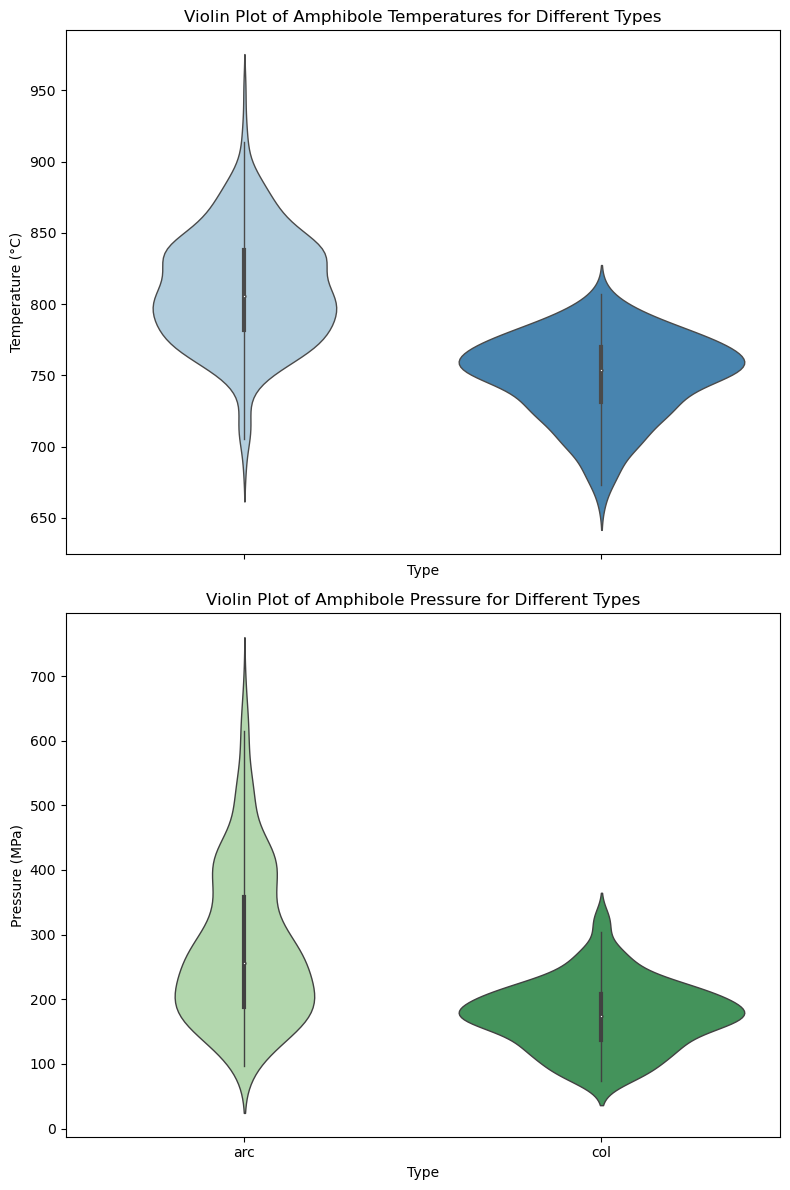

In [3]:
amphibole_data = pd.read_csv('Amphibole.csv')

fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

sb.violinplot(data=amphibole_data, y='temperature', x='Type', palette='Blues', ax=axes[0], linewidth=1.0)
axes[0].set_title('Violin Plot of Amphibole Temperatures for Different Types')
axes[0].set_ylabel('Temperature (°C)')

sb.violinplot(data=amphibole_data, y='pressure', x='Type', palette='Greens', ax=axes[1], linewidth=1.0)
axes[1].set_title('Violin Plot of Amphibole Pressure for Different Types')
axes[1].set_ylabel('Pressure (MPa)')

plt.tight_layout()
plt.savefig('temperature_pressure_violin_plots.svg', format='svg')
plt.show()